## Loading the Data

In [1]:
# FallAllD files to Python struct
# By By Majd SALEH 08-April-2020.
import os
from numpy import genfromtxt
import numpy as np
import pandas as pd 

oldDir=os.getcwd()
ParentDir=os.getcwd()
FP=ParentDir+"\\FallAllD\\"
os.chdir(FP)
FileNamesAll=os.listdir(FP)
FileNames=[]
for f_name in FileNamesAll:
    if f_name.endswith('_A.dat'):
        FileNames.append(f_name)
LL=len(FileNames)

l_SubjectID=[]
l_Device=[]
l_ActivityID=[]
l_TrialNo=[]
l_Acc=[]
l_Gyr=[]
l_Mag=[]
l_Bar=[]

for i in range(LL):
    f_name=FileNames[i]
    SubjectID=int(f_name[1:3])    
    l_SubjectID.append(np.uint8(SubjectID))
    ActivityID=int(f_name[8:11])    
    l_ActivityID.append(np.uint8(ActivityID))
    TrialNo=int(f_name[13:15])    
    l_TrialNo.append(np.uint8(TrialNo))
    Device=''
    if(int(f_name[5])==1):
        Device='Neck'
    else:
        if (int(f_name[5])==2):
            Device='Wrist'
        else:
            Device='Waist'    
    l_Device.append(Device)
    
    l_Acc.append(np.int16(genfromtxt(f_name, delimiter=',')))
    chArr=list(f_name)
    chArr[16]='G'
    f_name="".join(chArr)    
    l_Gyr.append(np.int16(genfromtxt(f_name, delimiter=',')))
    chArr=list(f_name)
    chArr[16]='M'
    f_name="".join(chArr)    
    l_Mag.append(np.int16(genfromtxt(f_name, delimiter=',')))
    chArr=list(f_name)
    chArr[16]='B'
    f_name="".join(chArr)    
    l_Bar.append(genfromtxt(f_name, delimiter=','))
    print(f'File  {i+1}  out of {len(FileNames)}')
os.chdir(oldDir)


FallAllD = pd.DataFrame(list(zip(l_SubjectID,l_Device,l_ActivityID,l_TrialNo,l_Acc,l_Gyr,l_Mag,l_Bar)), 
               columns =['SubjectID', 'Device','ActivityID','TrialNo','Acc','Gyr','Mag','Bar']) 

FallAllD.to_pickle('FallAllD.pkl')
FallAllD.to_hdf('FallAllD.h5', key='df', mode='w')
# to import data use:
#FallAllD = pd.read_pickle('FallAllD.pkl')
#FallAllD = pd.read_hdf('FallAllD.h5', 'df')

File  1  out of 6605
File  2  out of 6605
File  3  out of 6605
File  4  out of 6605
File  5  out of 6605
File  6  out of 6605
File  7  out of 6605
File  8  out of 6605
File  9  out of 6605
File  10  out of 6605
File  11  out of 6605
File  12  out of 6605
File  13  out of 6605
File  14  out of 6605
File  15  out of 6605
File  16  out of 6605
File  17  out of 6605
File  18  out of 6605
File  19  out of 6605
File  20  out of 6605
File  21  out of 6605
File  22  out of 6605
File  23  out of 6605
File  24  out of 6605
File  25  out of 6605
File  26  out of 6605
File  27  out of 6605
File  28  out of 6605
File  29  out of 6605
File  30  out of 6605
File  31  out of 6605
File  32  out of 6605
File  33  out of 6605
File  34  out of 6605
File  35  out of 6605
File  36  out of 6605
File  37  out of 6605
File  38  out of 6605
File  39  out of 6605
File  40  out of 6605
File  41  out of 6605
File  42  out of 6605
File  43  out of 6605
File  44  out of 6605
File  45  out of 6605
File  46  out of 66

C:\Users\Archisa\AppData\Local\Temp\ipykernel_13964\3362804797.py:67: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Device', 'Acc', 'Gyr', 'Mag', 'Bar'], dtype='object')]

  FallAllD.to_hdf('FallAllD.h5', key='df', mode='w')


In [2]:
FallAllD.head()

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag,Bar
0,1,Neck,13,1,"[[4155, 55, -82], [4157, 55, -126], [4157, 50,...","[[1613, 205, 77], [1626, 202, 74], [1634, 199,...","[[3543, -780, 1995], [3537, -823, 1958], [3520...","[[1013.193859563175, 23.71569457530976], [1013..."
1,1,Neck,13,2,"[[4002, -50, 156], [4002, -38, 172], [4003, -2...","[[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...","[[3701, 401, 1960], [3746, 365, 2026], [3816, ...","[[1013.214612231942, 24.11322125434876], [1013..."
2,1,Neck,13,3,"[[3983, 40, -335], [3984, 38, -324], [3987, 34...","[[1651, 208, 63], [1652, 203, 60], [1656, 198,...","[[3849, -680, 1685], [3834, -707, 1717], [3857...","[[1013.25438772214, 24.49373892784119], [1013...."
3,1,Neck,13,4,"[[3959, 165, 197], [3953, 165, 196], [3951, 16...","[[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...","[[3565, -465, -187], [3543, -468, -176], [3553...","[[1013.167161107663, 24.72971366882324], [1013..."
4,1,Neck,13,5,"[[3750, -182, 252], [3767, -166, 259], [3781, ...","[[394, -59, 3], [397, -63, -1], [394, -66, -3]...","[[3952, 103, 1828], [3973, 133, 1809], [3972, ...","[[1013.304382379492, 25.49256420612335], [1013..."


In [3]:
fd = FallAllD
fd.head()

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag,Bar
0,1,Neck,13,1,"[[4155, 55, -82], [4157, 55, -126], [4157, 50,...","[[1613, 205, 77], [1626, 202, 74], [1634, 199,...","[[3543, -780, 1995], [3537, -823, 1958], [3520...","[[1013.193859563175, 23.71569457530976], [1013..."
1,1,Neck,13,2,"[[4002, -50, 156], [4002, -38, 172], [4003, -2...","[[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...","[[3701, 401, 1960], [3746, 365, 2026], [3816, ...","[[1013.214612231942, 24.11322125434876], [1013..."
2,1,Neck,13,3,"[[3983, 40, -335], [3984, 38, -324], [3987, 34...","[[1651, 208, 63], [1652, 203, 60], [1656, 198,...","[[3849, -680, 1685], [3834, -707, 1717], [3857...","[[1013.25438772214, 24.49373892784119], [1013...."
3,1,Neck,13,4,"[[3959, 165, 197], [3953, 165, 196], [3951, 16...","[[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...","[[3565, -465, -187], [3543, -468, -176], [3553...","[[1013.167161107663, 24.72971366882324], [1013..."
4,1,Neck,13,5,"[[3750, -182, 252], [3767, -166, 259], [3781, ...","[[394, -59, 3], [397, -63, -1], [394, -66, -3]...","[[3952, 103, 1828], [3973, 133, 1809], [3972, ...","[[1013.304382379492, 25.49256420612335], [1013..."


In [4]:
fd.shape

(6605, 8)

In [5]:
fd.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       SubjectID  Device  ActivityID  TrialNo    Acc    Gyr    Mag    Bar
0         False   False       False    False  False  False  False  False
1         False   False       False    False  False  False  False  False
2         False   False       False    False  False  False  False  False
3         False   False       False    False  False  False  False  False
4         False   False       False    False  False  False  False  False
...         ...     ...         ...      ...    ...    ...    ...    ...
6600      False   False       False    False  False  False  False  False
6601      False   False       False    False  False  False  False  False
6602      False   False       False    False  False  False  False  False
6603      False   False       False    False  False  False  False  False
6604      False   False       False    False  False  False  False  False

[6605 rows x 8 columns]>

In [6]:
fd.isna().any().any()

False

In [7]:
fd.describe()

,SubjectID,ActivityID,TrialNo
count,6605.000000,6605.000000,6605.000000
mean,7.830280,46.688721,2.985314
std,4.535991,43.086720,2.523169
min,1.000000,1.000000,1.000000
25%,3.000000,16.000000,1.000000
50%,8.000000,26.000000,2.000000
75%,12.000000,102.000000,4.000000
max,15.000000,135.000000,16.000000


In [21]:
acc = fd['Acc']
print(acc)

0       [[4155, 55, -82], [4157, 55, -126], [4157, 50,...
1       [[4002, -50, 156], [4002, -38, 172], [4003, -2...
2       [[3983, 40, -335], [3984, 38, -324], [3987, 34...
3       [[3959, 165, 197], [3953, 165, 196], [3951, 16...
4       [[3750, -182, 252], [3767, -166, 259], [3781, ...
                              ...                        
6600    [[3805, 827, 464], [3822, 855, 481], [3836, 80...
6601    [[4019, -542, 564], [4014, -542, 564], [4016, ...
6602    [[3884, -1500, 557], [3875, -1485, 570], [3915...
6603    [[4045, -152, 405], [4043, -143, 398], [4040, ...
6604    [[4006, -691, 18], [4010, -708, 24], [4007, -7...
Name: Acc, Length: 6605, dtype: object


## Data Visualisation

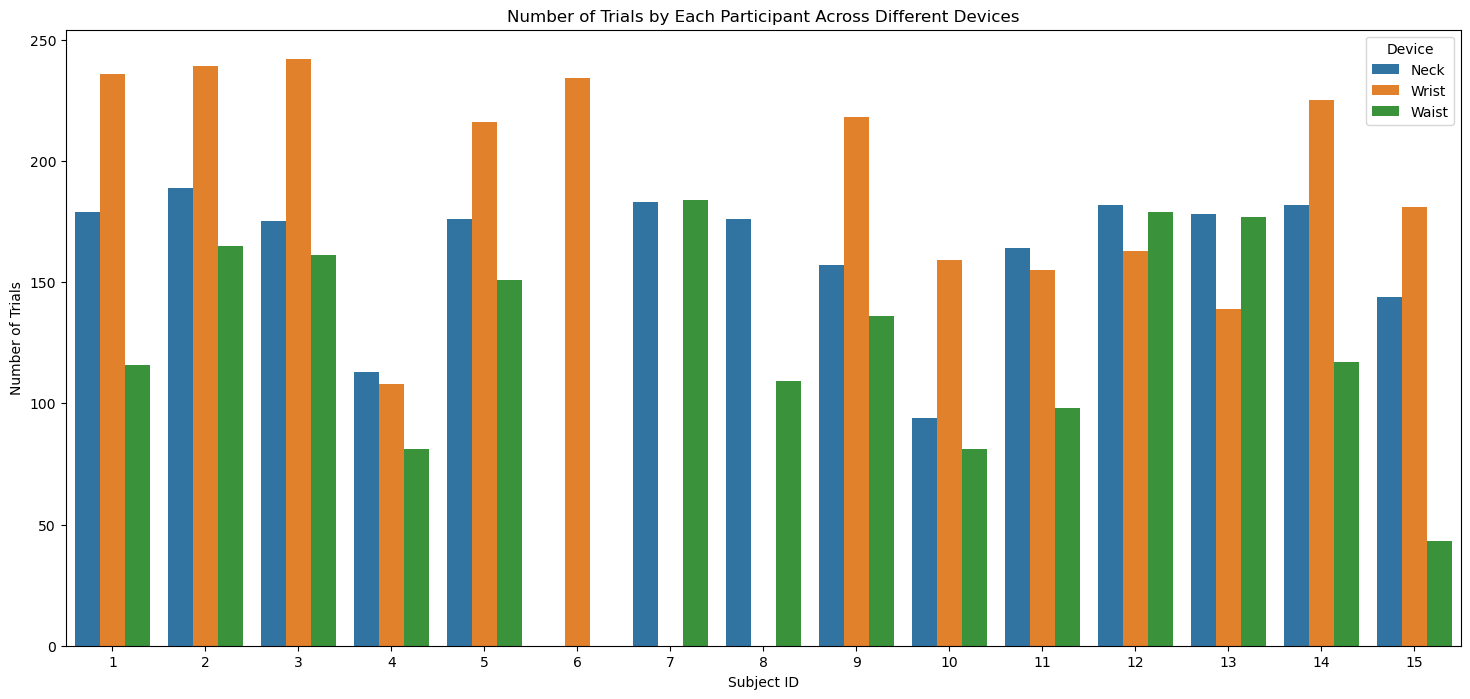

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of trials for each subject across different devices
plt.figure(figsize=(18, 8))
sns.countplot(x='SubjectID', hue='Device', data=fd)
plt.title('Number of Trials by Each Participant Across Different Devices')
plt.xlabel('Subject ID')
plt.ylabel('Number of Trials')
plt.legend(title='Device')
plt.show()


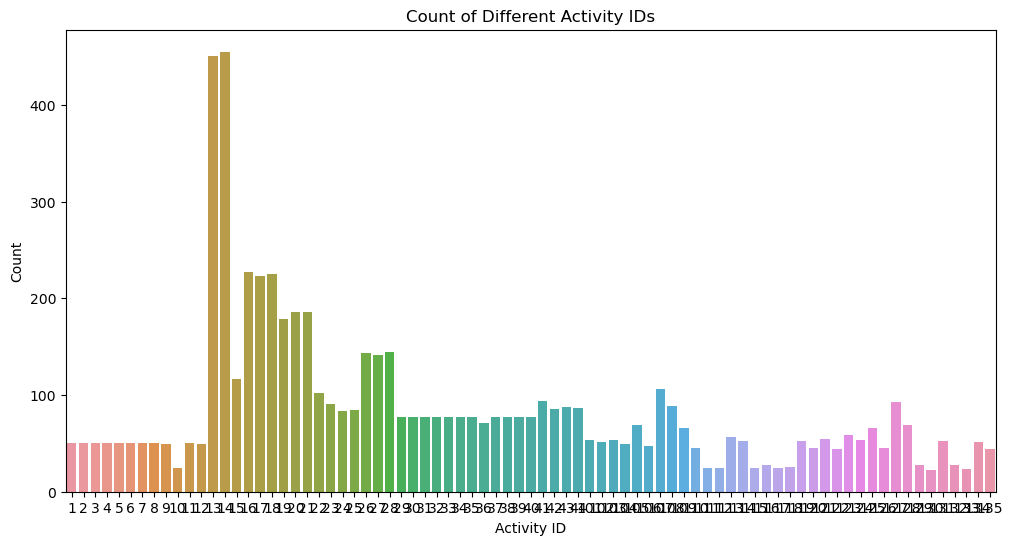

In [10]:
# Plotting the count of different Activity IDs
plt.figure(figsize=(12, 6))
sns.countplot(x='ActivityID', data=fd)
plt.title('Count of Different Activity IDs')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()


##### Activity IDs that stimulate falls: 101-135

## Dataset Distribution into train and test

In [12]:
# Create a new 'fall' column with 'Yes' if ActivityID is between 101 and 135, 'No' otherwise
fd['fall'] = fd['ActivityID'].between(101, 135).map({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(fd)


      SubjectID Device  ActivityID  TrialNo  \
0             1   Neck          13        1   
1             1   Neck          13        2   
2             1   Neck          13        3   
3             1   Neck          13        4   
4             1   Neck          13        5   
...         ...    ...         ...      ...   
6600         15  Waist         131        2   
6601         15  Waist         132        1   
6602         15  Waist         134        2   
6603         15  Waist         135        1   
6604         15  Waist         135        2   

                                                    Acc  \
0     [[4155, 55, -82], [4157, 55, -126], [4157, 50,...   
1     [[4002, -50, 156], [4002, -38, 172], [4003, -2...   
2     [[3983, 40, -335], [3984, 38, -324], [3987, 34...   
3     [[3959, 165, 197], [3953, 165, 196], [3951, 16...   
4     [[3750, -182, 252], [3767, -166, 259], [3781, ...   
...                                                 ...   
6600  [[3805, 827, 464

In [13]:
fd.head()

,SubjectID,Device,ActivityID,TrialNo,Acc,Gyr,Mag,Bar,fall
0,1,Neck,13,1,"[[4155, 55, -82], [4157, 55, -126], [4157, 50,...","[[1613, 205, 77], [1626, 202, 74], [1634, 199,...","[[3543, -780, 1995], [3537, -823, 1958], [3520...","[[1013.193859563175, 23.71569457530976], [1013...",No
1,1,Neck,13,2,"[[4002, -50, 156], [4002, -38, 172], [4003, -2...","[[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...","[[3701, 401, 1960], [3746, 365, 2026], [3816, ...","[[1013.214612231942, 24.11322125434876], [1013...",No
2,1,Neck,13,3,"[[3983, 40, -335], [3984, 38, -324], [3987, 34...","[[1651, 208, 63], [1652, 203, 60], [1656, 198,...","[[3849, -680, 1685], [3834, -707, 1717], [3857...","[[1013.25438772214, 24.49373892784119], [1013....",No
3,1,Neck,13,4,"[[3959, 165, 197], [3953, 165, 196], [3951, 16...","[[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...","[[3565, -465, -187], [3543, -468, -176], [3553...","[[1013.167161107663, 24.72971366882324], [1013...",No
4,1,Neck,13,5,"[[3750, -182, 252], [3767, -166, 259], [3781, ...","[[394, -59, 3], [397, -63, -1], [394, -66, -3]...","[[3952, 103, 1828], [3973, 133, 1809], [3972, ...","[[1013.304382379492, 25.49256420612335], [1013...",No


#### Using 80% of the data to train and 20% to test, with fall being the target column

In [ ]:
# from sklearn.model_selection import train_test_split

# # Need to predict Yes or No on the target column 'fall'

# # Specify the features (X) and target variable (y)
# X = fd.drop('fall', axis=1)  # Features (all columns except the target_column)
# y = fd['fall']  # Target variable

# # Split the data into training and testing sets (80% training, 20% testing in this example)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Now you can use X_train and y_train for training your model,
# # and X_test and y_test for evaluating its performance.


## HMM (Hidden Markov Model)

## LSTM (Long Short Term Memory)

## Hybrid HMM-LSTM